# Exploratory Data Analysis (EDA)

## Imports

In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import string
import pickle
import spacy

nlp = spacy.load('en_core_web_sm')

## Load Datasets

In [90]:
scripts_df = pd.read_csv('Data/Processed/simpsons_cleaned_script_lines.csv')
episods_df = pd.read_csv('Data/Processed/simpsons_cleaned_episodes.csv')

scripts_df.head()

,episode_id,character,location,raw_text
0,32,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim..."
1,32,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?
2,32,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...
3,32,Lisa Simpson,Springfield Elementary School,That life is worth living.
4,32,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...


## Analysis

### Twenty Most Common Words

In [129]:
all_words = []

for i, raw_text in enumerate(scripts_df['raw_text']):
    
    # Convert to lowercase
    raw_text = raw_text.lower()
    
    # Lemmatize and remove stop words
    new_text = ' '.join([token.lemma_ for token in nlp(raw_text) if token.lemma_ not in nlp.Defaults.stop_words])
    
    # Remove punctuation
    new_text = new_text.translate(str.maketrans('', '', string.punctuation))
    
    # Split and add to all_wrds list
    all_words += new_text.split()
    
    # Log
    if i % 1000 == 0:
        print(f'Processing {i} Script...')

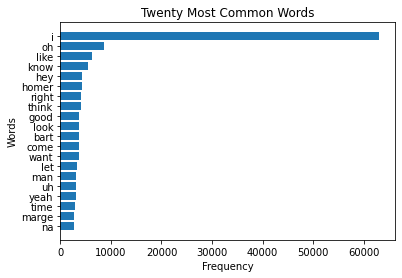

In [131]:
word_freq = pd.Series(all_words).value_counts().sort_values(ascending = False)

plt.barh(word_freq[:20].keys()[::-1], word_freq[:20].values[::-1])
plt.title('Twenty Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Ten Most Active Characters

In [135]:
characters_freq = scripts_df['character'].value_counts().sort_values(ascending = False)

plt.barh(characters_freq[:10].keys()[::-1], characters_freq[:10].values[::-1])
plt.title('Ten Most Active Words')
plt.xlabel('Frequency')
plt.ylabel('Character')
plt.show()